In [1]:
import pandas as pd
import networkx as nx

In [2]:
from io import BytesIO
from zipfile import ZipFile
import urllib.request as urllib
import matplotlib.pyplot as plt

In [3]:
url = "http://www-personal.umich.edu/~mejn/netdata/dolphins.zip"

In [4]:
with urllib.urlopen(url) as stream:
    with ZipFile(BytesIO(stream.read())) as archive:
        txt = archive.read('dolphins.txt').decode()
        gml = archive.read('dolphins.gml').decode()

In [5]:
print(gml)

Creator "Mark Newman on Wed Jul 26 15:04:20 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "Beak"
  ]
  node
  [
    id 1
    label "Beescratch"
  ]
  node
  [
    id 2
    label "Bumper"
  ]
  node
  [
    id 3
    label "CCL"
  ]
  node
  [
    id 4
    label "Cross"
  ]
  node
  [
    id 5
    label "DN16"
  ]
  node
  [
    id 6
    label "DN21"
  ]
  node
  [
    id 7
    label "DN63"
  ]
  node
  [
    id 8
    label "Double"
  ]
  node
  [
    id 9
    label "Feather"
  ]
  node
  [
    id 10
    label "Fish"
  ]
  node
  [
    id 11
    label "Five"
  ]
  node
  [
    id 12
    label "Fork"
  ]
  node
  [
    id 13
    label "Gallatin"
  ]
  node
  [
    id 14
    label "Grin"
  ]
  node
  [
    id 15
    label "Haecksel"
  ]
  node
  [
    id 16
    label "Hook"
  ]
  node
  [
    id 17
    label "Jet"
  ]
  node
  [
    id 18
    label "Jonah"
  ]
  node
  [
    id 19
    label "Knit"
  ]
  node
  [
    id 20
    label "Kringel"
  ]
  node
  [
    id 21
    label "M

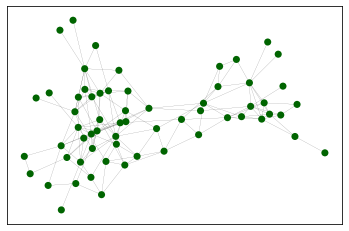

In [6]:
G = nx.parse_gml(gml)
colors = ['darkgreen' for n in G]
options = {
    'node_color':colors,
    'node_size':50,
    'linewidths': 0,
    'width':0.1,
    'with_labels':False,
}
nx.draw_networkx(G,**options)
plt.show()

In [7]:
dict_central = nx.degree_centrality(G)
df = pd.DataFrame.from_dict(dict_central,orient = 'index').reset_index()

In [8]:
df.columns

Index(['index', 0], dtype='object')

In [9]:
df.head(5)

,index,0
0,Beak,0.098361
1,Beescratch,0.131148
2,Bumper,0.065574
3,CCL,0.049180
4,Cross,0.016393


In [10]:
df.rename(columns = {'index': 'dophin_type',0:'centrality_degree'},inplace = True)

In [11]:
df = df.sort_values('centrality_degree')
print("the weaknest link is " + str(df['dophin_type'][0]) + ", with a centrality_degree of: " + str(df['centrality_degree'][0]))

the weaknest link is Beak, with a centrality_degree of: 0.09836065573770492


In [12]:
# Remove the most effective node
df = df.sort_values('centrality_degree',ascending = False)

In [13]:
df.head(5)

,dophin_type,centrality_degree
14,Grin,0.196721
45,Topless,0.180328
37,SN4,0.180328
33,Scabs,0.163934
51,Trigger,0.163934


After removing the node which has the highest centrality degree, the plot is below

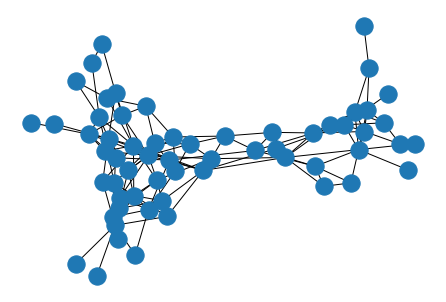

In [14]:
G.remove_node('Grin')
nx.draw(G)
plt.show()

No much difference since the centrality degree is only about 0.197, let's remove the top 5 nodes with highest centrality degree.

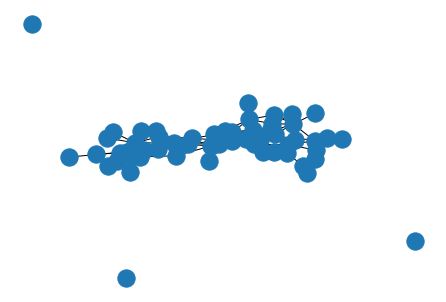

In [15]:
# remove the top 5 nodes with highest centrality degrees
G.remove_node('Topless')
G.remove_node("SN4")
G.remove_node('Scabs')
G.remove_node('Trigger')
nx.draw(G)
plt.show()

Some of the nodes lost their edges.

# Write up
I used the dophin network data to see the relationship between them.
To see how the network affected by removing the most effected node, the centrality degree is considered as a parameter to evaluate if the importance of the nodes. To finding the node with the highest centrality degree. "Grin" has the highest degree of about 0.197. After removing "Grin" node, the graph doesn't changed a lot. Due to the low degree, I removed the top 5 nodes with highest degree, the plot shows that some of the nodes lost their edges. In conclusion, removing a node with a significant highest centrality degree, the impact to the network is expected to be affected. 